In [1]:
#downloading the dataset
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
#od.download("https://www.kaggle.com/datasets/hijest/genre-classification-data-imdbset")

In [4]:
import os
data='.\genre-classification-dataset-imdb'
os.listdir(data)

['Genre Classification Dataset']

In [5]:
import pandas as pd
train_data = pd.read_csv('train_data.csv', delimiter=':::',names=['id', 'title', 'genre', 'description'], engine="python")

In [6]:
import os
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
#exploratory analysis of the  data
train_data.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [8]:
train_data.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
train_data.shape

(54214, 4)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
train_data.nunique()

id             54214
title          54214
genre             27
description    54086
dtype: int64

In [12]:

train_data.columns
#data.shape

Index(['id', 'title', 'genre', 'description'], dtype='object')

In [13]:
train_data.isnull().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [14]:
test_data = pd.read_csv('test_data.csv', delimiter=':::',names=['id', 'title', 'description'], engine="python")

In [15]:
test_data.head()

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


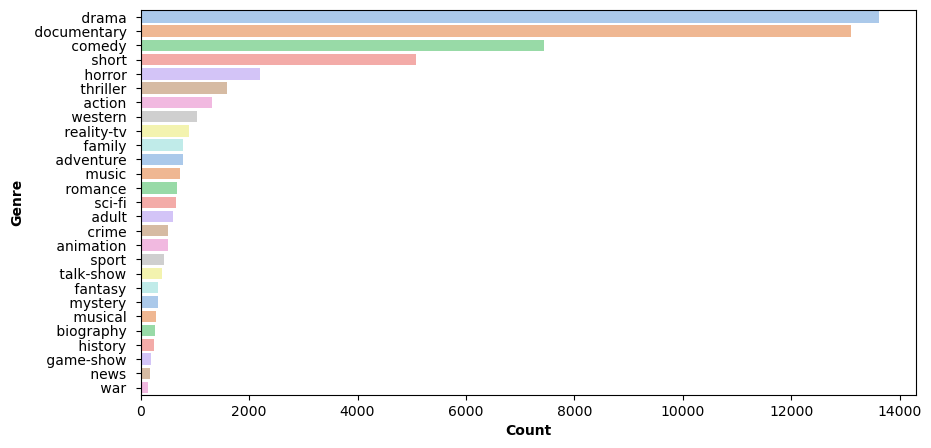

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, y='genre', order=train_data['genre'].value_counts().index, palette='pastel')
plt.xlabel('Count', fontsize=10, fontweight="heavy")
plt.ylabel('Genre', fontsize=10, fontweight="heavy")
plt.show()

In [25]:
train_data['text_length'] = train_data['description'].apply(lambda x: len(x))

text_length_stats = train_data['text_length'].describe()

print("Text Length Statistics:")
print(text_length_stats)

Text Length Statistics:
count    54214.000000
mean       600.452429
std        446.026620
min         42.000000
25%        325.000000
50%        464.000000
75%        713.000000
max      10504.000000
Name: text_length, dtype: float64


In [91]:
train_data['corpus'] = train_data['description'].apply(clean)
corpus=train_data['corpus'].tolist()
print(corpus[:10])

[' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.', ' A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.', ' As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most ero

In [90]:
#data preprocessing
nltk.download('stopwords')
corpus=[]
def clean(description):
    for i in range(0, 50000):
        review = re.sub('[^a-zA-Z]', ' ', train_data['description'][i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove('not')
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        return description
        corpus.append(review)
#print(corpus)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
test_data = test_data.reindex(range(54214))


In [93]:
train_data['corpus'] = corpus
test_data['corpus'] = corpus


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['corpus'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['corpus'])

In [94]:
X=X_train
y=train_data['genre']

In [95]:
#training the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [96]:
print(len(train_data['genre']))

54214


In [97]:
print(len(train_data['description']))

54214


In [99]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [100]:
import numpy as np
y_pred=np.array(y_pred)
y_test=np.array(y_test)

In [101]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[' documentary ' ' documentary ']
 [' drama ' ' drama ']
 [' documentary ' ' documentary ']
 ...
 [' documentary ' ' short ']
 [' documentary ' ' history ']
 [' documentary ' ' documentary ']]


In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    0    0    0    0    0    0   62  186    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   13   97    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   47  103    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0   46   60    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   37   15    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   48    0  251 1198    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   10   80    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    

In [103]:
accuracy_score(y_test, y_pred)

0.4451720003689016

In [104]:
#classification_repport(y_test, y_pred)

In [105]:
#predicitng the results of the test data
testpred=classifier.predict(X_test)

In [106]:
testpred


array([' documentary ', ' drama ', ' documentary ', ..., ' documentary ',
       ' documentary ', ' documentary '], dtype='<U13')